In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teacher_core = pd.read_excel('../data/Teacher_Core_District_Consolidated_2022 (1).xlsx')
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,2 to 4 hours,4 to 6 hours,6 to 10 hours,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,72,964,Tennessee Schools For The Deaf,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9648,73,964,Tennessee Schools For The Deaf,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9649,74,964,Tennessee Schools For The Deaf,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9650,75,964,Tennessee Schools For The Deaf,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [3]:
teacher_core = pd.DataFrame(teacher_core)
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,2 to 4 hours,4 to 6 hours,6 to 10 hours,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,72,964,Tennessee Schools For The Deaf,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9648,73,964,Tennessee Schools For The Deaf,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9649,74,964,Tennessee Schools For The Deaf,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9650,75,964,Tennessee Schools For The Deaf,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [4]:
district_numbers = pd.read_csv('../data/data_district_to_county_crosswalk.csv')

In [5]:
teacher_core = pd.merge(teacher_core, district_numbers, left_on = 'District ID', right_on = 'District Number', how = 'inner')
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate,County Number,County Name,District Number
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,72,961,Alvin C York Institute,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961
9496,73,961,Alvin C York Institute,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961
9497,74,961,Alvin C York Institute,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961
9498,75,961,Alvin C York Institute,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961


In [6]:
teacher_core_stats = teacher_core[['District', 'Prompt', 'Strongly Disagree', 'Disagree',
                             'Agree', 'Strongly Agree', 'County Name']]
teacher_core_stats.head()

,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree,County Name
0,Anderson County,NaN,4.0,11.0,47.0,38.0,Anderson County
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0,Anderson County
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0,Anderson County
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0,Anderson County
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0,Anderson County


In [7]:
teacher_core_stats.head(100)

,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree,County Name
0,Anderson County,NaN,4.0,11.0,47.0,38.0,Anderson County
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0,Anderson County
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0,Anderson County
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0,Anderson County
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0,Anderson County
...,...,...,...,...,...,...,...
95,Bedford County,NaN,3.0,16.0,54.0,27.0,Bedford County
96,Bedford County,Teachers at my school feel responsible when st...,2.0,20.0,57.0,20.0,Bedford County
97,Bedford County,Teachers at my school feel responsible to help...,2.0,9.0,55.0,34.0,Bedford County
98,Bedford County,Teachers at my school help maintain discipline...,5.0,22.0,49.0,25.0,Bedford County


In [8]:
teacher_core_stats.to_csv('../data/teacher_core_stats.csv')

In [9]:
avg_str_agree = teacher_core_stats[['Strongly Agree', 'District']]
avg_str_agree

,Strongly Agree,District
0,38.0,Anderson County
1,41.0,Anderson County
2,50.0,Anderson County
3,47.0,Anderson County
4,42.0,Anderson County
...,...,...
9495,NaN,Alvin C York Institute
9496,NaN,Alvin C York Institute
9497,NaN,Alvin C York Institute
9498,NaN,Alvin C York Institute


In [10]:
avg_str_agree.dtypes

Strongly Agree    float64
District           object
dtype: object

In [11]:
avg_str_agree = avg_str_agree.loc[(avg_str_agree['Strongly Agree'] > 1)]
avg_str_agree

,Strongly Agree,District
0,38.0,Anderson County
1,41.0,Anderson County
2,50.0,Anderson County
3,47.0,Anderson County
4,42.0,Anderson County
...,...,...
9451,16.0,Alvin C York Institute
9455,13.0,Alvin C York Institute
9456,6.0,Alvin C York Institute
9457,13.0,Alvin C York Institute


In [12]:
avg_str_agree.columns = ['per_strongly_agree', 'district']
avg_str_agree

,per_strongly_agree,district
0,38.0,Anderson County
1,41.0,Anderson County
2,50.0,Anderson County
3,47.0,Anderson County
4,42.0,Anderson County
...,...,...
9451,16.0,Alvin C York Institute
9455,13.0,Alvin C York Institute
9456,6.0,Alvin C York Institute
9457,13.0,Alvin C York Institute


In [13]:
avg_str_agree.describe()

,per_strongly_agree
count,3997.000000
mean,29.398299
std,11.223544
min,2.000000
25%,22.000000
50%,29.000000
75%,36.000000
max,80.000000


In [14]:
avg_str_agree_dist = avg_str_agree.groupby('district').mean()

avg_str_agree_dist = avg_str_agree_dist.reset_index()

In [15]:
avg_str_agree_dist = avg_str_agree_dist.sort_values('per_strongly_agree', ascending = False)

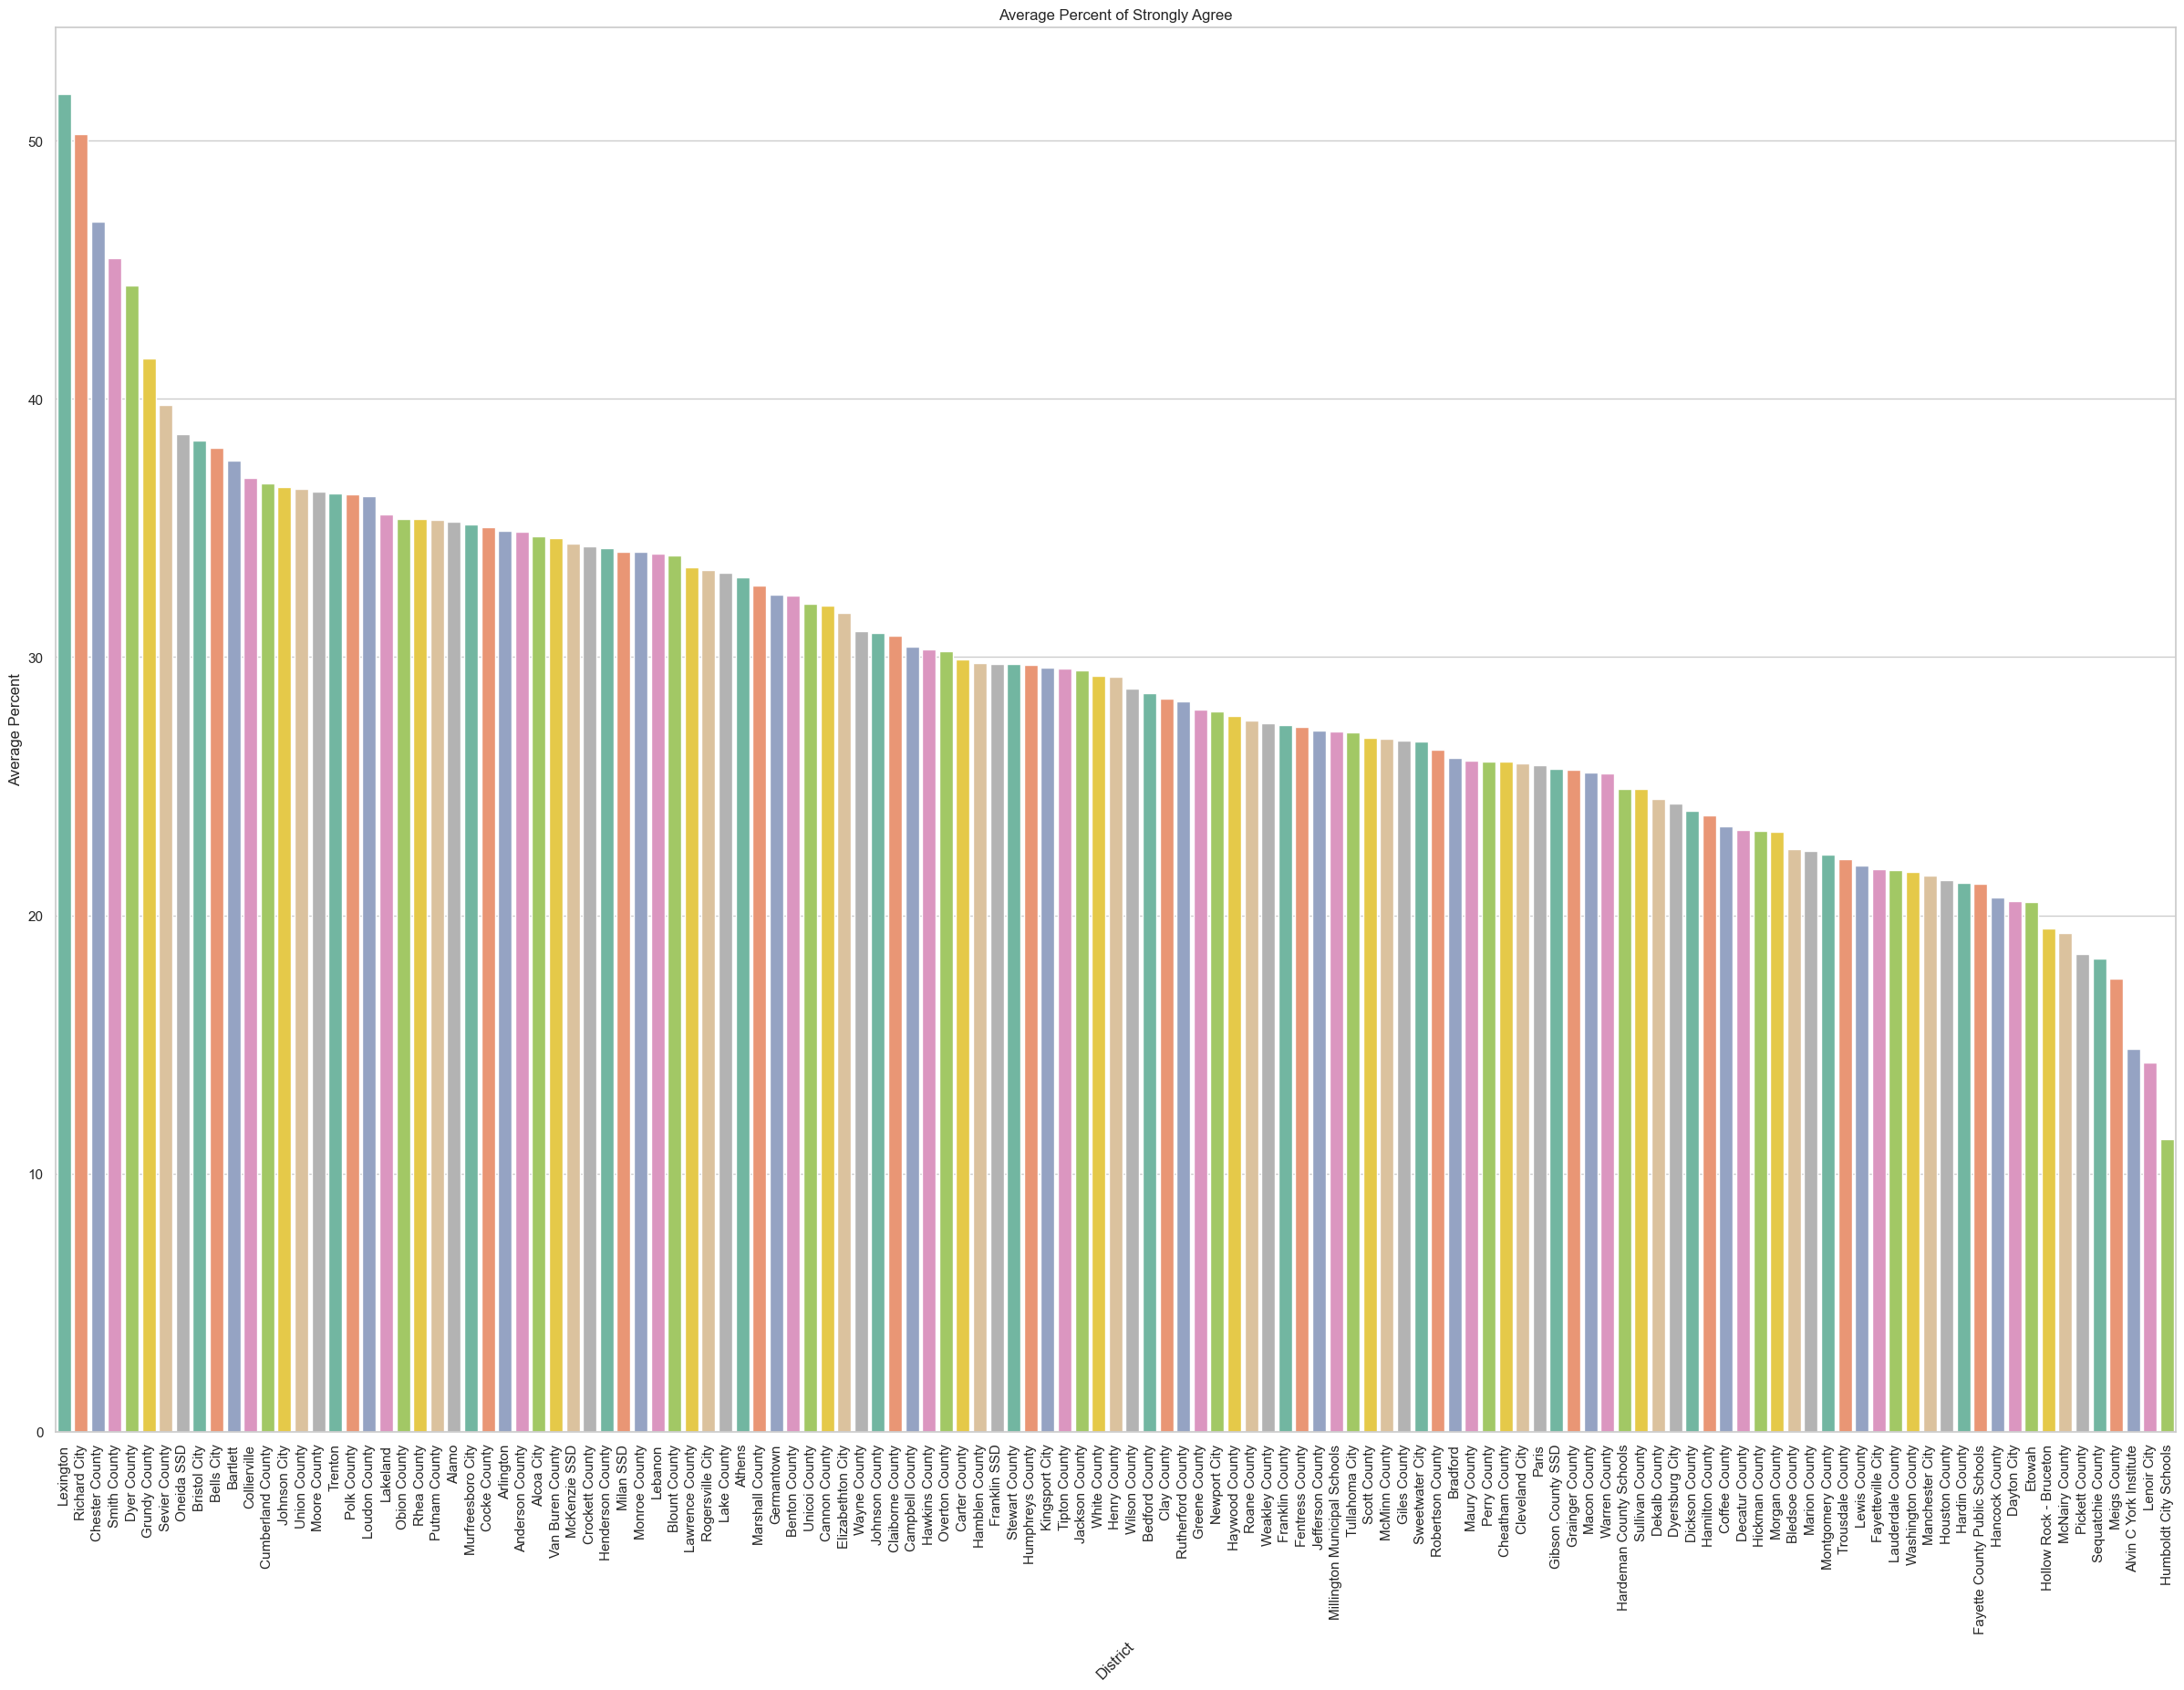

In [16]:
plt.figure(figsize = (30, 20))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'district', 
            y = 'per_strongly_agree', 
            data = avg_str_agree_dist, 
            palette = 'Set2')
plt.xlabel('District', rotation = 45)                                              
plt.ylabel('Average Percent')                                              
plt.title('Average Percent of Strongly Agree')
plt.xticks(rotation=90);

In [17]:
top_avg_str_agree = avg_str_agree_dist.head(24)
top_avg_str_agree = top_avg_str_agree.reset_index()
top_avg_str_agree

,index,district,per_strongly_agree
0,72,Lexington,51.81250
1,100,Richard City,50.25000
2,18,Chester County,46.87500
3,108,Smith County,45.46875
4,31,Dyer County,44.40625
5,45,Grundy County,41.56250
6,107,Sevier County,39.75000
7,92,Oneida SSD,38.62500
8,13,Bristol City,38.37500
9,8,Bells City,38.09375


In [18]:
avg_str_dis = teacher_core_stats[['Strongly Disagree', 'District']]
avg_str_dis

,Strongly Disagree,District
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9495,NaN,Alvin C York Institute
9496,NaN,Alvin C York Institute
9497,NaN,Alvin C York Institute
9498,NaN,Alvin C York Institute


In [19]:
avg_str_dis.dtypes

Strongly Disagree    float64
District              object
dtype: object

In [20]:
avg_str_dis = avg_str_dis.loc[(avg_str_dis['Strongly Disagree'] > 1)]
avg_str_dis

,Strongly Disagree,District
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9441,3.0,Alvin C York Institute
9448,3.0,Alvin C York Institute
9449,16.0,Alvin C York Institute
9457,6.0,Alvin C York Institute


In [21]:
avg_str_dis.columns = ['per_strongly_dis', 'district']
avg_str_dis

,per_strongly_dis,district
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9441,3.0,Alvin C York Institute
9448,3.0,Alvin C York Institute
9449,16.0,Alvin C York Institute
9457,6.0,Alvin C York Institute


In [22]:
avg_str_dis_dist = avg_str_dis.groupby('district').mean()

avg_str_dis_dist = avg_str_dis_dist.reset_index()

In [23]:
avg_str_dis_dist = avg_str_dis_dist.sort_values('per_strongly_dis', ascending = False)

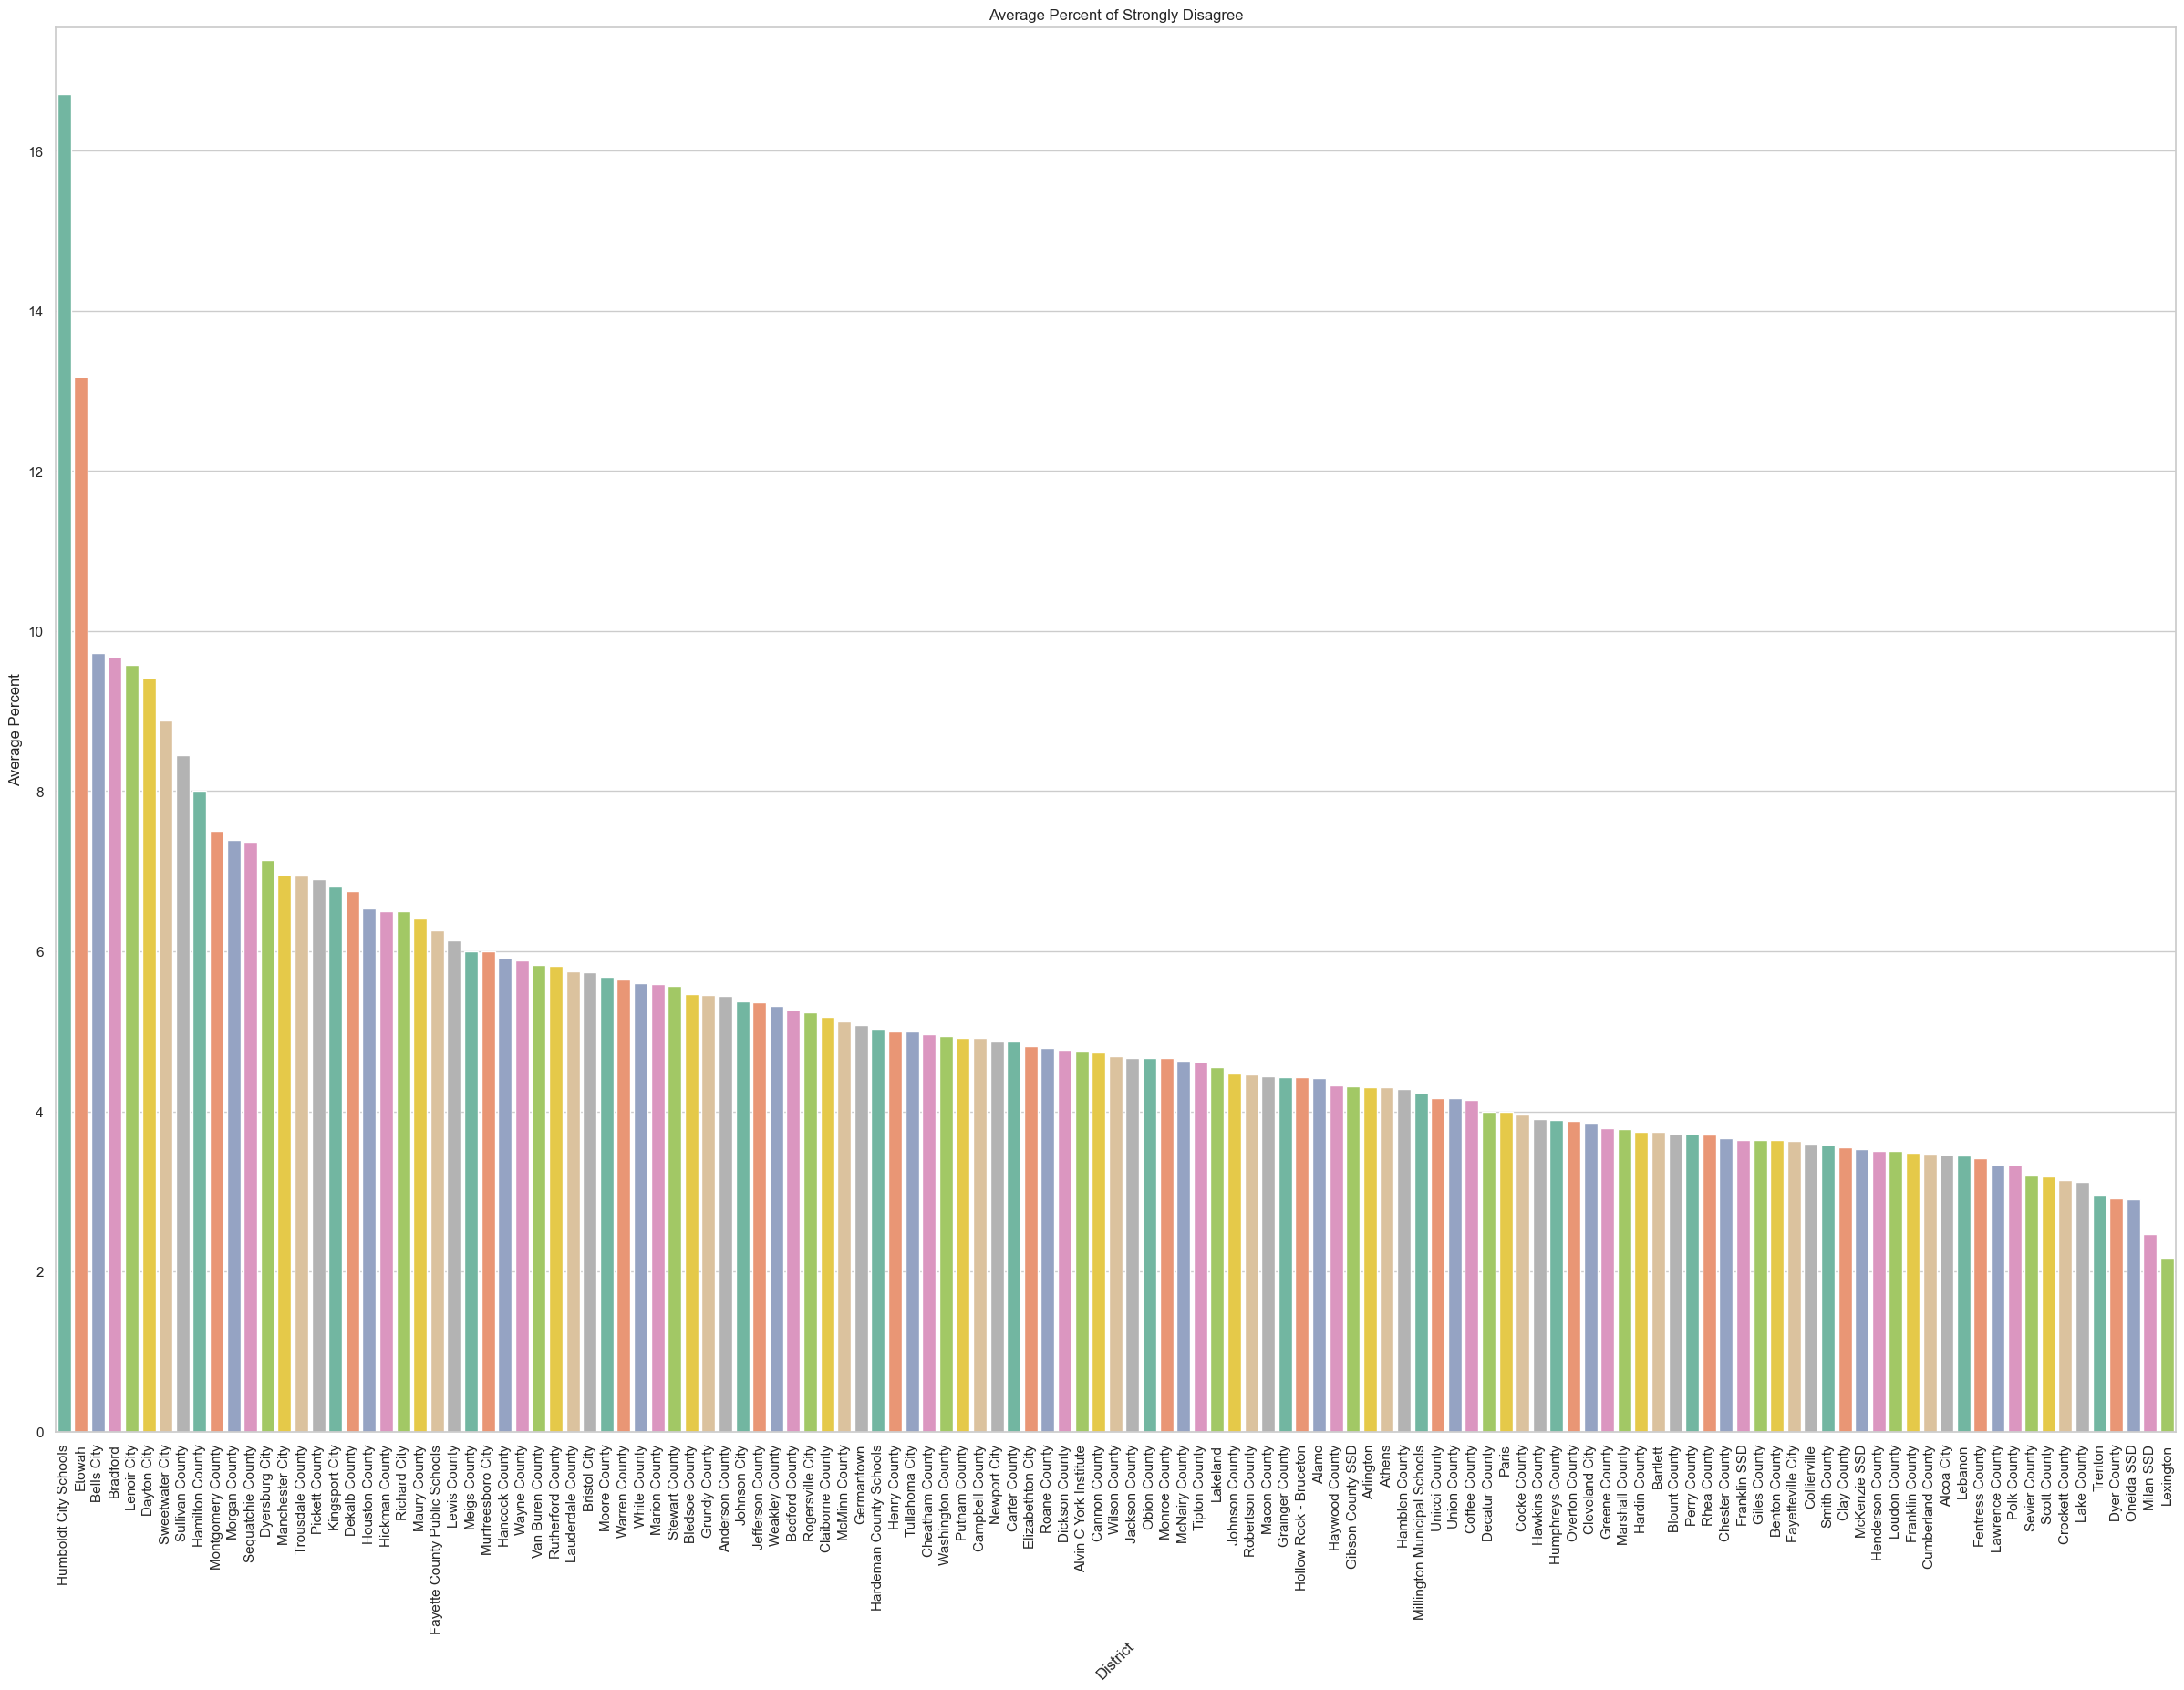

In [24]:
plt.figure(figsize = (30, 20))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'district', 
            y = 'per_strongly_dis', 
            data = avg_str_dis_dist, 
            palette = 'Set2')
plt.xlabel('District', rotation = 45)                                              
plt.ylabel('Average Percent')                                              
plt.title('Average Percent of Strongly Disagree')
plt.xticks(rotation=90);

In [25]:
top_str_dis = avg_str_dis_dist.head(24)
top_str_dis

,district,per_strongly_dis
58,Humboldt City Schools,16.709677
34,Etowah,13.173913
8,Bells City,9.727273
12,Bradford,9.684211
70,Lenoir City,9.583333
27,Dayton City,9.416667
111,Sweetwater City,8.884615
110,Sullivan County,8.444444
47,Hamilton County,8.000000
86,Montgomery County,7.500000


In [26]:
scores = pd.read_excel('../data/district_assessment_file_suppressed_upd32323.xlsx')
scores

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2022,10,Anderson County,EOC,Algebra I,10,All Students,99,79,78,77,**,**,**,**,**,**,**,**,1.3
1,2022,10,Anderson County,EOC,Algebra I,10,American Indian or Alaska Native,*,1,1,1,*,*,*,*,*,*,*,*,*
2,2022,10,Anderson County,EOC,Algebra I,10,Black or African American,*,2,2,2,*,*,*,*,*,*,*,*,*
3,2022,10,Anderson County,EOC,Algebra I,10,Black/Hispanic/Native American,*,10,10,9,*,*,*,*,*,*,*,*,*
4,2022,10,Anderson County,EOC,Algebra I,10,Economically Disadvantaged,97,34,33,33,**,**,**,**,**,**,**,**,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167626,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-English Learners/Transitional 1-4,99,77,76,76,**,**,**,**,**,**,**,**,6.6
167627,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-Students with Disabilities,99,82,81,78,**,**,**,**,**,**,**,**,7.7
167628,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Students with Disabilities,*,7,7,7,*,*,*,*,*,*,*,*,*
167629,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Super Subgroup,99,85,84,81,**,**,**,**,**,**,**,**,6.2


In [27]:
dist_scores_percent = scores.loc[(scores.grade == 'All Grades')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
69,2022,10,Anderson County,EOC,Algebra I,All Grades,All Students,99,633,626,616,322,140,133,21,52.3,22.7,21.6,3.4,25
70,2022,10,Anderson County,EOC,Algebra I,All Grades,American Indian or Alaska Native,*,3,3,3,*,*,*,*,*,*,*,*,*
71,2022,10,Anderson County,EOC,Algebra I,All Grades,Asian,*,9,9,9,*,*,*,*,*,*,*,*,*
72,2022,10,Anderson County,EOC,Algebra I,All Grades,Black or African American,100,21,21,21,**,**,**,**,**,**,**,**,9.5
73,2022,10,Anderson County,EOC,Algebra I,All Grades,Black/Hispanic/Native American,96,52,50,40,26,8,4,2,65,20,10,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167626,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-English Learners/Transitional 1-4,99,77,76,76,**,**,**,**,**,**,**,**,6.6
167627,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-Students with Disabilities,99,82,81,78,**,**,**,**,**,**,**,**,7.7
167628,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Students with Disabilities,*,7,7,7,*,*,*,*,*,*,*,*,*
167629,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Super Subgroup,99,85,84,81,**,**,**,**,**,**,**,**,6.2


In [28]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.student_group == 'All Students')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
69,2022,10,Anderson County,EOC,Algebra I,All Grades,All Students,99,633,626,616,322,140,133,21,52.3,22.7,21.6,3.4,25
155,2022,10,Anderson County,EOC,Algebra II,All Grades,All Students,98,472,463,463,186,126,137,14,40.2,27.2,29.6,3,32.6
249,2022,10,Anderson County,EOC,Biology I,All Grades,All Students,99,545,537,535,114,204,194,23,21.3,38.1,36.3,4.3,40.6
250,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,Biology I,All Grades,All Students,*,8,8,8,*,*,*,*,*,*,*,*,*
490,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,85,53,45,45,12,7,18,8,26.6,15.6,40,17.8,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167442,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Science,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
167443,2022,987,Tennessee Public Charter School Commission,TNReady,Science,All Grades,All Students,99,634,629,620,134,290,182,14,21.5,46.8,29.4,2.3,31.6
167532,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Social Studies,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
167533,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,All Students,100,259,258,256,**,**,**,**,**,**,**,**,29.7


In [29]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.subject == 'ELA')|(dist_scores_percent.subject == 'Math')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
490,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,85,53,45,45,12,7,18,8,26.6,15.6,40,17.8,57.8
491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,2674,2667,725,1148,639,155,27.2,43,24,5.8,29.8
930,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,Math,All Grades,All Students,85,53,45,45,6,14,23,2,13.4,31.1,51.1,4.4,55.6
931,2022,10,Anderson County,TNReady,Math,All Grades,All Students,98,2611,2551,2544,886,941,548,169,34.9,37,21.5,6.6,28.2
1451,2022,11,Clinton,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166107,2022,985,Achievement School District,TNReady,Math,All Grades,All Students,96,4824,4616,4551,**,**,**,**,**,**,**,**,6.1
166941,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,*,4,4,4,*,*,*,*,*,*,*,*,*
166942,2022,987,Tennessee Public Charter School Commission,TNReady,ELA,All Grades,All Students,99,634,628,620,147,259,178,36,23.7,41.8,28.7,5.8,34.5
167295,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Math,All Grades,All Students,*,4,4,4,*,*,*,*,*,*,*,*,*


In [30]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.test == 'TNReady')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,2674,2667,725,1148,639,155,27.2,43,24,5.8,29.8
931,2022,10,Anderson County,TNReady,Math,All Grades,All Students,98,2611,2551,2544,886,941,548,169,34.9,37,21.5,6.6,28.2
1452,2022,11,Clinton,TNReady,ELA,All Grades,All Students,99,504,501,497,76,174,167,80,15.3,35,33.6,16.1,49.7
1565,2022,11,Clinton,TNReady,Math,All Grades,All Students,98,504,496,492,92,160,180,60,18.7,32.5,36.6,12.2,48.8
2259,2022,12,Oak Ridge,TNReady,ELA,All Grades,All Students,98,2050,2011,2004,338,795,648,223,16.9,39.7,32.3,11.1,43.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165084,2022,970,Department Of Children's Services Education Di...,TNReady,Math,All Grades,All Students,*,2,0,0,*,*,*,*,*,*,*,*,*
165618,2022,985,Achievement School District,TNReady,ELA,All Grades,All Students,96,4837,4621,4557,2553,1604,353,47,56.1,35.2,7.7,1,8.8
166107,2022,985,Achievement School District,TNReady,Math,All Grades,All Students,96,4824,4616,4551,**,**,**,**,**,**,**,**,6.1
166942,2022,987,Tennessee Public Charter School Commission,TNReady,ELA,All Grades,All Students,99,634,628,620,147,259,178,36,23.7,41.8,28.7,5.8,34.5


In [31]:
dist_scores_percent = dist_scores_percent[['system_name','system', 'subject', 'pct_below', 'pct_approaching', 'pct_met_expectations', 'pct_exceeded_expectations', 'pct_met_exceeded']]

In [32]:
dist_scores_percent

,system_name,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
491,Anderson County,10,ELA,27.2,43,24,5.8,29.8
931,Anderson County,10,Math,34.9,37,21.5,6.6,28.2
1452,Clinton,11,ELA,15.3,35,33.6,16.1,49.7
1565,Clinton,11,Math,18.7,32.5,36.6,12.2,48.8
2259,Oak Ridge,12,ELA,16.9,39.7,32.3,11.1,43.5
...,...,...,...,...,...,...,...,...
165084,Department Of Children's Services Education Di...,970,Math,*,*,*,*,*
165618,Achievement School District,985,ELA,56.1,35.2,7.7,1,8.8
166107,Achievement School District,985,Math,**,**,**,**,6.1
166942,Tennessee Public Charter School Commission,987,ELA,23.7,41.8,28.7,5.8,34.5


In [33]:
dist_scores_percent = dist_scores_percent.rename (columns = {'system_name':'district'})
dist_scores_percent

,district,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
491,Anderson County,10,ELA,27.2,43,24,5.8,29.8
931,Anderson County,10,Math,34.9,37,21.5,6.6,28.2
1452,Clinton,11,ELA,15.3,35,33.6,16.1,49.7
1565,Clinton,11,Math,18.7,32.5,36.6,12.2,48.8
2259,Oak Ridge,12,ELA,16.9,39.7,32.3,11.1,43.5
...,...,...,...,...,...,...,...,...
165084,Department Of Children's Services Education Di...,970,Math,*,*,*,*,*
165618,Achievement School District,985,ELA,56.1,35.2,7.7,1,8.8
166107,Achievement School District,985,Math,**,**,**,**,6.1
166942,Tennessee Public Charter School Commission,987,ELA,23.7,41.8,28.7,5.8,34.5


In [34]:
dist_scores_percent.to_csv('../data/dist_scores_percent.csv')

In [35]:
top_sat_scores = pd.merge(top_avg_str_agree, dist_scores_percent, on = 'district', how = 'left').dropna()
top_sat_scores

,index,district,per_strongly_agree,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,72,Lexington,51.81250,391.0,ELA,17.3,45,30.3,7.4,37.8
1,72,Lexington,51.81250,391.0,Math,16.6,40.6,33.1,9.7,42.8
2,100,Richard City,50.25000,581.0,ELA,31.5,45.3,20.9,2.3,23.3
3,100,Richard City,50.25000,581.0,Math,40.6,41.9,12.8,4.7,17.4
4,18,Chester County,46.87500,120.0,ELA,15.6,40.8,34.1,9.5,43.6
5,18,Chester County,46.87500,120.0,Math,17.1,33.5,35.8,13.6,49.4
6,108,Smith County,45.46875,800.0,ELA,15.9,43.7,32.8,7.6,40.4
7,108,Smith County,45.46875,800.0,Math,21.2,39.3,30.8,8.7,39.5
8,31,Dyer County,44.40625,230.0,ELA,17.8,42.2,31.7,8.3,39.9
9,31,Dyer County,44.40625,230.0,Math,21.9,36.5,30.9,10.7,41.6


In [36]:
top_sat_scores.to_csv('../data/top_sat_scores.csv')

In [37]:
top_dis_scores = pd.merge(top_str_dis, dist_scores_percent, on = 'district', how = 'left').dropna()
top_dis_scores

,district,per_strongly_dis,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,Humboldt City Schools,16.709677,271.0,ELA,52.1,35.7,10.9,1.3,12.3
1,Humboldt City Schools,16.709677,271.0,Math,61,29.8,7.9,1.3,9.2
2,Etowah,13.173913,542.0,ELA,20.7,45.2,26.9,7.2,34.1
3,Etowah,13.173913,542.0,Math,24.5,40.4,29.3,5.8,35.1
5,Bradford,9.684211,274.0,ELA,14.6,40.1,36.8,8.5,45.2
6,Bradford,9.684211,274.0,Math,22.1,39.7,27.2,11,38.2
7,Lenoir City,9.583333,531.0,ELA,28.2,45.5,22.2,4.1,26.3
8,Lenoir City,9.583333,531.0,Math,30.2,37.2,25.3,7.3,32.5
11,Sullivan County,8.444444,820.0,ELA,25.5,43.6,25,5.9,30.9
12,Sullivan County,8.444444,820.0,Math,34.5,37.9,21.8,5.8,27.7


In [38]:
top_dis_scores.to_csv('../data/top_dis_scores.csv')

In [39]:
top_sat_and_dis = pd.concat([top_sat_scores, top_dis_scores]).reset_index()
top_sat_and_dis = top_sat_and_dis.drop(columns=['index', 'level_0'])

In [40]:
top_sat_and_dis.to_csv('../data/top_sat_and_dis.csv')

In [41]:
top_sat_and_dis.fillna(0, inplace=True)
top_sat_and_dis

,district,per_strongly_agree,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,per_strongly_dis
0,Lexington,51.8125,391.0,ELA,17.3,45,30.3,7.4,37.8,0.000000
1,Lexington,51.8125,391.0,Math,16.6,40.6,33.1,9.7,42.8,0.000000
2,Richard City,50.2500,581.0,ELA,31.5,45.3,20.9,2.3,23.3,0.000000
3,Richard City,50.2500,581.0,Math,40.6,41.9,12.8,4.7,17.4,0.000000
4,Chester County,46.8750,120.0,ELA,15.6,40.8,34.1,9.5,43.6,0.000000
...,...,...,...,...,...,...,...,...,...,...
69,Maury County,0.0000,600.0,Math,39.6,35.1,20,5.3,25.3,6.407407
70,Fayette County Public Schools,0.0000,240.0,ELA,43.3,38.3,15.3,3.1,18.4,6.258065
71,Fayette County Public Schools,0.0000,240.0,Math,54.6,31.9,11.9,1.6,13.4,6.258065
72,Lewis County,0.0000,510.0,ELA,18.2,45.7,28.6,7.5,36.1,6.136364


In [42]:
for index, row in top_sat_and_dis.iterrows():
    if row.per_strongly_agree != 0 :
        top_sat_and_dis.loc[index, 'sat_or_dis'] =  'Satisfied'
    else:
        top_sat_and_dis.loc[index, 'sat_or_dis'] = 'Dissatisfied'
   
 

In [43]:
top_sat_and_dis

,district,per_strongly_agree,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,per_strongly_dis,sat_or_dis
0,Lexington,51.8125,391.0,ELA,17.3,45,30.3,7.4,37.8,0.000000,Satisfied
1,Lexington,51.8125,391.0,Math,16.6,40.6,33.1,9.7,42.8,0.000000,Satisfied
2,Richard City,50.2500,581.0,ELA,31.5,45.3,20.9,2.3,23.3,0.000000,Satisfied
3,Richard City,50.2500,581.0,Math,40.6,41.9,12.8,4.7,17.4,0.000000,Satisfied
4,Chester County,46.8750,120.0,ELA,15.6,40.8,34.1,9.5,43.6,0.000000,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
69,Maury County,0.0000,600.0,Math,39.6,35.1,20,5.3,25.3,6.407407,Dissatisfied
70,Fayette County Public Schools,0.0000,240.0,ELA,43.3,38.3,15.3,3.1,18.4,6.258065,Dissatisfied
71,Fayette County Public Schools,0.0000,240.0,Math,54.6,31.9,11.9,1.6,13.4,6.258065,Dissatisfied
72,Lewis County,0.0000,510.0,ELA,18.2,45.7,28.6,7.5,36.1,6.136364,Dissatisfied


In [44]:
top_sat_and_dis.to_csv('../data/top_sat_and_dis.csv')

In [45]:
q_01c_sat = teacher_core_stats.loc[(teacher_core_stats['Prompt']== 'I am generally satisfied with being a teacher in this school.')]

In [46]:
generally_satisfied = q_01c_sat.reset_index(drop=True)

In [47]:
top_generally_sat = generally_satisfied.sort_values(by = 'Strongly Agree', ascending = False).head(12)
top_generally_sat

,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree,County Name
52,Lexington,I am generally satisfied with being a teacher ...,2.0,0.0,32.0,67.0,Henderson County
105,Smith County,I am generally satisfied with being a teacher ...,0.0,2.0,36.0,63.0,Smith County
14,Chester County,I am generally satisfied with being a teacher ...,1.0,1.0,36.0,63.0,Chester County
24,Bells City,I am generally satisfied with being a teacher ...,0.0,10.0,29.0,62.0,Crockett County
81,Moore County,I am generally satisfied with being a teacher ...,0.0,11.0,27.0,62.0,Moore County
5,Alcoa City,I am generally satisfied with being a teacher ...,1.0,5.0,33.0,61.0,Blount County
74,Richard City,I am generally satisfied with being a teacher ...,0.0,10.0,30.0,60.0,Marion County
29,Dyer County,I am generally satisfied with being a teacher ...,1.0,4.0,36.0,59.0,Dyer County
42,Grundy County,I am generally satisfied with being a teacher ...,1.0,9.0,33.0,57.0,Grundy County
25,Cumberland County,I am generally satisfied with being a teacher ...,1.0,3.0,40.0,56.0,Cumberland County


In [48]:
top_generally_sat = top_generally_sat.drop(columns = ['Strongly Disagree', 'Disagree', 'Agree'])

In [49]:
top_generally_sat = top_generally_sat.rename(columns = {'District':'district', 'Prompt': 'prompt',
                                                       'Strongly Agree': 'strongly_agree'})
top_generally_sat

,district,prompt,strongly_agree,County Name
52,Lexington,I am generally satisfied with being a teacher ...,67.0,Henderson County
105,Smith County,I am generally satisfied with being a teacher ...,63.0,Smith County
14,Chester County,I am generally satisfied with being a teacher ...,63.0,Chester County
24,Bells City,I am generally satisfied with being a teacher ...,62.0,Crockett County
81,Moore County,I am generally satisfied with being a teacher ...,62.0,Moore County
5,Alcoa City,I am generally satisfied with being a teacher ...,61.0,Blount County
74,Richard City,I am generally satisfied with being a teacher ...,60.0,Marion County
29,Dyer County,I am generally satisfied with being a teacher ...,59.0,Dyer County
42,Grundy County,I am generally satisfied with being a teacher ...,57.0,Grundy County
25,Cumberland County,I am generally satisfied with being a teacher ...,56.0,Cumberland County


In [50]:
top_generally_sat = pd.merge(top_generally_sat, dist_scores_percent, on = 'district', how = 'left').dropna()
top_generally_sat

,district,prompt,strongly_agree,County Name,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,Lexington,I am generally satisfied with being a teacher ...,67.0,Henderson County,391.0,ELA,17.3,45,30.3,7.4,37.8
1,Lexington,I am generally satisfied with being a teacher ...,67.0,Henderson County,391.0,Math,16.6,40.6,33.1,9.7,42.8
2,Smith County,I am generally satisfied with being a teacher ...,63.0,Smith County,800.0,ELA,15.9,43.7,32.8,7.6,40.4
3,Smith County,I am generally satisfied with being a teacher ...,63.0,Smith County,800.0,Math,21.2,39.3,30.8,8.7,39.5
4,Chester County,I am generally satisfied with being a teacher ...,63.0,Chester County,120.0,ELA,15.6,40.8,34.1,9.5,43.6
5,Chester County,I am generally satisfied with being a teacher ...,63.0,Chester County,120.0,Math,17.1,33.5,35.8,13.6,49.4
7,Moore County,I am generally satisfied with being a teacher ...,62.0,Moore County,640.0,ELA,23.2,42.1,30.9,3.8,34.7
8,Moore County,I am generally satisfied with being a teacher ...,62.0,Moore County,640.0,Math,27.3,40.7,26,6,32
10,Richard City,I am generally satisfied with being a teacher ...,60.0,Marion County,581.0,ELA,31.5,45.3,20.9,2.3,23.3
11,Richard City,I am generally satisfied with being a teacher ...,60.0,Marion County,581.0,Math,40.6,41.9,12.8,4.7,17.4


In [51]:
top_generally_sat['pct_met_expectations'] = top_generally_sat['pct_met_expectations'].astype(float)
top_generally_sat['pct_exceeded_expectations'] = top_generally_sat['pct_exceeded_expectations'].astype(float)

In [52]:
top_generally_sat['pct_met_exc'] = top_generally_sat.pct_met_expectations + top_generally_sat.pct_exceeded_expectations
top_generally_sat

,district,prompt,strongly_agree,County Name,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,pct_met_exc
0,Lexington,I am generally satisfied with being a teacher ...,67.0,Henderson County,391.0,ELA,17.3,45,30.3,7.4,37.8,37.7
1,Lexington,I am generally satisfied with being a teacher ...,67.0,Henderson County,391.0,Math,16.6,40.6,33.1,9.7,42.8,42.8
2,Smith County,I am generally satisfied with being a teacher ...,63.0,Smith County,800.0,ELA,15.9,43.7,32.8,7.6,40.4,40.4
3,Smith County,I am generally satisfied with being a teacher ...,63.0,Smith County,800.0,Math,21.2,39.3,30.8,8.7,39.5,39.5
4,Chester County,I am generally satisfied with being a teacher ...,63.0,Chester County,120.0,ELA,15.6,40.8,34.1,9.5,43.6,43.6
5,Chester County,I am generally satisfied with being a teacher ...,63.0,Chester County,120.0,Math,17.1,33.5,35.8,13.6,49.4,49.4
7,Moore County,I am generally satisfied with being a teacher ...,62.0,Moore County,640.0,ELA,23.2,42.1,30.9,3.8,34.7,34.7
8,Moore County,I am generally satisfied with being a teacher ...,62.0,Moore County,640.0,Math,27.3,40.7,26.0,6.0,32,32.0
10,Richard City,I am generally satisfied with being a teacher ...,60.0,Marion County,581.0,ELA,31.5,45.3,20.9,2.3,23.3,23.2
11,Richard City,I am generally satisfied with being a teacher ...,60.0,Marion County,581.0,Math,40.6,41.9,12.8,4.7,17.4,17.5


In [53]:
met_and_exceeded = top_generally_sat[['district', 'strongly_agree', 'pct_met_exc']]
met_and_exceeded

,district,strongly_agree,pct_met_exc
0,Lexington,67.0,37.7
1,Lexington,67.0,42.8
2,Smith County,63.0,40.4
3,Smith County,63.0,39.5
4,Chester County,63.0,43.6
5,Chester County,63.0,49.4
7,Moore County,62.0,34.7
8,Moore County,62.0,32.0
10,Richard City,60.0,23.2
11,Richard City,60.0,17.5


In [54]:
scores.head(50)

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2022,10,Anderson County,EOC,Algebra I,10,All Students,99,79,78,77,**,**,**,**,**,**,**,**,1.3
1,2022,10,Anderson County,EOC,Algebra I,10,American Indian or Alaska Native,*,1,1,1,*,*,*,*,*,*,*,*,*
2,2022,10,Anderson County,EOC,Algebra I,10,Black or African American,*,2,2,2,*,*,*,*,*,*,*,*,*
3,2022,10,Anderson County,EOC,Algebra I,10,Black/Hispanic/Native American,*,10,10,9,*,*,*,*,*,*,*,*,*
4,2022,10,Anderson County,EOC,Algebra I,10,Economically Disadvantaged,97,34,33,33,**,**,**,**,**,**,**,**,**
5,2022,10,Anderson County,EOC,Algebra I,10,English Learners,*,4,4,3,*,*,*,*,*,*,*,*,*
6,2022,10,Anderson County,EOC,Algebra I,10,English Learners with Transitional 1-4,*,4,4,3,*,*,*,*,*,*,*,*,*
7,2022,10,Anderson County,EOC,Algebra I,10,Female,97,30,29,28,**,**,**,**,**,**,**,**,3.6
8,2022,10,Anderson County,EOC,Algebra I,10,Hispanic,*,7,7,6,*,*,*,*,*,*,*,*,*
9,2022,10,Anderson County,EOC,Algebra I,10,Male,100,49,49,49,**,**,**,**,**,**,**,**,**


In [55]:
scores_new = scores.loc[(scores.student_group == 'All Students')]
scores_new

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2022,10,Anderson County,EOC,Algebra I,10,All Students,99,79,78,77,**,**,**,**,**,**,**,**,1.3
17,2022,10,Anderson County,EOC,Algebra I,11,All Students,*,7,6,6,*,*,*,*,*,*,*,*,*
33,2022,10,Anderson County,EOC,Algebra I,8,All Students,100,117,117,117,21,40,51,5,17.9,34.2,43.6,4.3,47.9
50,2022,10,Anderson County,EOC,Algebra I,9,All Students,99,429,424,415,222,97,81,15,53.5,23.4,19.5,3.6,23.1
69,2022,10,Anderson County,EOC,Algebra I,All Grades,All Students,99,633,626,616,322,140,133,21,52.3,22.7,21.6,3.4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167533,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,All Students,100,259,258,256,**,**,**,**,**,**,**,**,29.7
167567,2022,987,Tennessee Public Charter School Commission,EOC,US History,10,All Students,*,9,9,9,*,*,*,*,*,*,*,*,*
167582,2022,987,Tennessee Public Charter School Commission,EOC,US History,11,All Students,99,78,77,76,**,**,**,**,**,**,**,**,7.9
167600,2022,987,Tennessee Public Charter School Commission,EOC,US History,12,All Students,*,2,2,0,*,*,*,*,*,*,*,*,*


In [56]:
scores_new = scores_new.loc[(scores_new.subject == 'ELA')|(scores_new.subject == 'Math')]
scores_new

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
290,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,11,All Students,*,9,8,8,*,*,*,*,*,*,*,*,*
299,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,3,All Students,*,6,5,5,*,*,*,*,*,*,*,*,*
300,2022,10,Anderson County,TNReady,ELA,3,All Students,98,408,399,398,114,163,86,35,28.6,41,21.6,8.8,30.4
331,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,4,All Students,*,7,5,5,*,*,*,*,*,*,*,*,*
332,2022,10,Anderson County,TNReady,ELA,4,All Students,99,392,389,389,79,153,126,31,20.3,39.3,32.4,8,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167241,2022,987,Tennessee Public Charter School Commission,TNReady,Math,6,All Students,100,131,131,130,**,**,**,**,**,**,**,**,33.1
167262,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Math,7,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
167263,2022,987,Tennessee Public Charter School Commission,TNReady,Math,7,All Students,100,128,128,127,41,50,32,4,32.3,39.4,25.2,3.1,28.3
167295,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Math,All Grades,All Students,*,4,4,4,*,*,*,*,*,*,*,*,*


In [57]:
scores_new = scores_new.loc[(scores_new.test == 'TNReady')]
scores_new

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
300,2022,10,Anderson County,TNReady,ELA,3,All Students,98,408,399,398,114,163,86,35,28.6,41,21.6,8.8,30.4
332,2022,10,Anderson County,TNReady,ELA,4,All Students,99,392,389,389,79,153,126,31,20.3,39.3,32.4,8,40.4
364,2022,10,Anderson County,TNReady,ELA,5,All Students,98,383,377,375,113,133,108,21,30.1,35.5,28.8,5.6,34.4
397,2022,10,Anderson County,TNReady,ELA,6,All Students,96,453,436,435,129,184,104,18,29.7,42.3,23.9,4.1,28
427,2022,10,Anderson County,TNReady,ELA,7,All Students,97,537,522,521,119,244,124,34,22.9,46.8,23.8,6.5,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167204,2022,987,Tennessee Public Charter School Commission,TNReady,Math,4,All Students,91,45,41,41,20,14,6,1,48.9,34.1,14.6,2.4,17.1
167222,2022,987,Tennessee Public Charter School Commission,TNReady,Math,5,All Students,99,154,153,149,48,55,36,10,32.2,36.9,24.2,6.7,30.9
167241,2022,987,Tennessee Public Charter School Commission,TNReady,Math,6,All Students,100,131,131,130,**,**,**,**,**,**,**,**,33.1
167263,2022,987,Tennessee Public Charter School Commission,TNReady,Math,7,All Students,100,128,128,127,41,50,32,4,32.3,39.4,25.2,3.1,28.3


In [58]:
scores_new = scores_new[['system_name', 'pct_met_exceeded']]
scores_new

,system_name,pct_met_exceeded
300,Anderson County,30.4
332,Anderson County,40.4
364,Anderson County,34.4
397,Anderson County,28
427,Anderson County,30.3
...,...,...
167204,Tennessee Public Charter School Commission,17.1
167222,Tennessee Public Charter School Commission,30.9
167241,Tennessee Public Charter School Commission,33.1
167263,Tennessee Public Charter School Commission,28.3


In [59]:
scores_new.dtypes

system_name         object
pct_met_exceeded    object
dtype: object

In [60]:
sat_counties = ('Lexington', 'Smith County', 'Chester County', 'Moore County', 'Richard City', 'Dyer County',
                'Grundy County', 'Cumberland County', 'Obion County', 'Sevier County')

In [61]:
scores_new = scores_new.loc[scores.system_name.isin(sat_counties)]
scores_new = scores_new.dropna()

In [62]:
scores_new.dtypes

system_name         object
pct_met_exceeded    object
dtype: object

In [63]:
scores_new.isna()

,system_name,pct_met_exceeded
23830,False,False
23858,False,False
23887,False,False
23913,False,False
23942,False,False
...,...,...
137285,False,False
137310,False,False
137327,False,False
137353,False,False


In [64]:
teacher_core_stats

,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree,County Name
0,Anderson County,NaN,4.0,11.0,47.0,38.0,Anderson County
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0,Anderson County
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0,Anderson County
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0,Anderson County
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0,Anderson County
...,...,...,...,...,...,...,...
9495,Alvin C York Institute,Student grief and trauma related to COVID-19,NaN,NaN,NaN,NaN,Fentress County
9496,Alvin C York Institute,Maintaining and building relationships with st...,NaN,NaN,NaN,NaN,Fentress County
9497,Alvin C York Institute,Students missing crucial services/supports (fr...,NaN,NaN,NaN,NaN,Fentress County
9498,Alvin C York Institute,The long-term economic impacts for me and my s...,NaN,NaN,NaN,NaN,Fentress County


In [65]:
teacher_core_stats['avg_agree'] = teacher_core_stats[['Strongly Agree', 'Agree']].mean(axis=1)
teacher_core_stats = teacher_core_stats.dropna()

C:\Users\oxyje\AppData\Local\Temp\ipykernel_69160\2866960005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teacher_core_stats['avg_agree'] = teacher_core_stats[['Strongly Agree', 'Agree']].mean(axis=1)


In [66]:
teacher_core_stats['avg_disagree'] = teacher_core_stats[['Strongly Disagree', 'Disagree']].mean(axis=1)
teacher_core_stats

C:\Users\oxyje\AppData\Local\Temp\ipykernel_69160\1824340405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teacher_core_stats['avg_disagree'] = teacher_core_stats[['Strongly Disagree', 'Disagree']].mean(axis=1)


,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree,County Name,avg_agree,avg_disagree
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0,Anderson County,43.0,6.5
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0,Anderson County,44.0,6.5
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0,Anderson County,44.0,5.5
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0,Anderson County,44.0,5.5
5,Anderson County,Students treat adults with respect at this sch...,7.0,18.0,49.0,26.0,Anderson County,37.5,12.5
...,...,...,...,...,...,...,...,...,...
9451,Alvin C York Institute,Other teachers in my school seek me out for ad...,0.0,19.0,66.0,16.0,Fentress County,41.0,9.5
9455,Alvin C York Institute,This school regularly communicates with parent...,0.0,16.0,72.0,13.0,Fentress County,42.5,8.0
9456,Alvin C York Institute,I feel supported by the parents of my students.,0.0,13.0,81.0,6.0,Fentress County,43.5,6.5
9457,Alvin C York Institute,This school offers an array of opportunities f...,6.0,25.0,56.0,13.0,Fentress County,34.5,15.5


In [67]:
teacher_core_stats.to_csv('../data/teacher_core_stats.csv')

In [68]:
retention_data = pd.read_csv('../data/teacher_retention_2022.csv')
retention_data

,System Number,System Name,School Number,School Name,Percent Retained
0,0,State of Tennessee,0,All Schools,92.1
1,10,Anderson County,0,All Schools,85.6
2,10,Anderson County,2,Anderson County High School,90.5
3,10,Anderson County,3,Anderson County Career Technical Center,65.5
4,10,Anderson County,5,Andersonville Elementary,78.1
...,...,...,...,...,...
1955,985,Achievement School District,8135,Kirby Middle School,63.0
1956,985,Achievement School District,8140,Hillcrest High School,64.3
1957,986,Tennessee State Board of Education,0,All Schools,50.6
1958,986,Tennessee State Board of Education,8015,KIPP Antioch College Prep Elementary,75.8


In [69]:
retention_data = retention_data.loc[(retention_data['School Name'] == 'All Schools')]
retention_data.reset_index()

,index,System Number,System Name,School Number,School Name,Percent Retained
0,0,0,State of Tennessee,0,All Schools,92.1
1,1,10,Anderson County,0,All Schools,85.6
2,19,11,Clinton,0,All Schools,96.7
3,23,12,Oak Ridge,0,All Schools,91.4
4,32,20,Bedford County,0,All Schools,88.9
...,...,...,...,...,...,...
144,1911,964,Tennessee Schools for the Deaf,0,All Schools,78.9
145,1915,970,Department Of Children's Services Education Di...,0,All Schools,80.7
146,1918,971,Department of Correction,0,All Schools,83.8
147,1932,985,Achievement School District,0,All Schools,71.4


In [70]:
dist_scores_percent = pd.read_csv('../data/dist_scores_percent.csv')
dist_scores_percent

,Unnamed: 0,district,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,491,Anderson County,10,ELA,27.2,43,24,5.8,29.8
1,931,Anderson County,10,Math,34.9,37,21.5,6.6,28.2
2,1452,Clinton,11,ELA,15.3,35,33.6,16.1,49.7
3,1565,Clinton,11,Math,18.7,32.5,36.6,12.2,48.8
4,2259,Oak Ridge,12,ELA,16.9,39.7,32.3,11.1,43.5
...,...,...,...,...,...,...,...,...,...
287,165084,Department Of Children's Services Education Di...,970,Math,*,*,*,*,*
288,165618,Achievement School District,985,ELA,56.1,35.2,7.7,1,8.8
289,166107,Achievement School District,985,Math,**,**,**,**,6.1
290,166942,Tennessee Public Charter School Commission,987,ELA,23.7,41.8,28.7,5.8,34.5


In [71]:
district_numbers

,County Number,County Name,District Number
0,1,Anderson County,10
1,1,Anderson County,11
2,1,Anderson County,12
3,3,Bedford County,20
4,5,Benton County,30
...,...,...,...
137,187,Williamson County,940
138,187,Williamson County,941
139,189,Wilson County,950
140,189,Wilson County,951


In [72]:
dist_scores_percent = pd.merge(dist_scores_percent, district_numbers, left_on = 'system', right_on = 'District Number',
                              how = 'inner')
dist_scores_percent

,Unnamed: 0,district,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,County Number,County Name,District Number
0,491,Anderson County,10,ELA,27.2,43,24,5.8,29.8,1,Anderson County,10
1,931,Anderson County,10,Math,34.9,37,21.5,6.6,28.2,1,Anderson County,10
2,1452,Clinton,11,ELA,15.3,35,33.6,16.1,49.7,1,Anderson County,11
3,1565,Clinton,11,Math,18.7,32.5,36.6,12.2,48.8,1,Anderson County,11
4,2259,Oak Ridge,12,ELA,16.9,39.7,32.3,11.1,43.5,1,Anderson County,12
...,...,...,...,...,...,...,...,...,...,...,...,...
277,161560,Wilson County,950,Math,16.5,31.3,35.4,16.8,52.2,189,Wilson County,950
278,162231,Lebanon,951,ELA,25.8,41.3,26.4,6.5,32.9,189,Wilson County,951
279,162516,Lebanon,951,Math,27.5,36.6,28.6,7.3,35.8,189,Wilson County,951
280,165618,Achievement School District,985,ELA,56.1,35.2,7.7,1,8.8,157,Shelby County,985


In [74]:
dist_scores_percent.to_csv('../data/dist_scores_percent.csv')